In [1]:
#implemented a neural network from scratch

In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
np.random.seed(0)
x= np.linspace(0, 2*np.pi, 1000).reshape(-1, 1)  
y= np.sin(x)
x1=x[0:1000]
y1=y[0:1000]
x1=(x1-np.pi)/(np.pi)


In [4]:
class Neuralnetwork:
    def __init__(self, step_size=0.01, max=1000, eps=1e-5):
        self.step_size=step_size
        self.max=max
        self.eps=eps
        self.cost=[]
        self.w1=np.random.normal(0,(2/21)**(1/2),size=(20,1))
        self.b1=np.random.normal(0,(2/21)**(1/2),size=(20,1))
        self.w2=np.random.normal(0,(2/21)**(1/2),size=(1,20))
        self.b2=np.random.normal(0,(2/21)**(1/2),size=(1,1))
        self.batch=16
    def forward(self,x):
        z1=(x)@(self.w1.T)+self.b1.T
        a1=np.tanh(z1)
        z2=(a1)@(self.w2.T)+self.b2.T
        a2=np.tanh(z2)
        ypred=a2
        cache=(x,z1,a1,z2,a2)
        return ypred,cache
    def loss(self,ypred,y):
        return np.mean((y-ypred)**2)
    def backprop(self,y,cache):
        x,z1,a1,z2,a2=cache
        m=y.shape[0]
        dl_a2= 2 * (a2 - y) / m 
        da2_z2=(1-a2**2)
        dl_z2=dl_a2*da2_z2
        dl_dw2=(dl_z2).T@a1
        dl_b2=np.sum(dl_z2,axis=0,keepdims=True)
        dl_a1=dl_z2@(self.w2)
        dl_z1=dl_a1*(1-a1**2)
        dl_w1=(dl_z1).T@x
        dl_b1=np.sum(dl_z1, axis=0, keepdims=True).T 
        return dl_dw2,dl_b2,dl_w1,dl_b1
    def fit(self,x,y):
        for epoch in range(self.max):
            indices = np.random.permutation(x.shape[0])
            x_shuffled = x[indices]
            y_shuffled = y[indices]
            epoch_loss = 0
            num_batches = 0
            for i in range(0, x.shape[0], self.batch):
                x_batch = x_shuffled[i:i+self.batch]
                y_batch = y_shuffled[i:i+self.batch]
                ypred,cache=self.forward(x_batch)
                loss1=self.loss(ypred,y_batch)
                epoch_loss += loss1
                num_batches += 1
                dl_dw2,dl_b2,dl_w1,dl_b1=self.backprop(y_batch,cache)
                self.w2=self.w2-self.step_size*dl_dw2
                self.w1=self.w1-self.step_size*dl_w1
                self.b1=self.b1-self.step_size*dl_b1
                self.b2=self.b2-self.step_size*dl_b2
            self.cost.append(epoch_loss / num_batches)
        return self.cost,self.w2,self.w1,self.b1,self.b2
        
n1=Neuralnetwork()
cost,w2,w1,b1,b2=n1.fit(x1,y1)


    
        

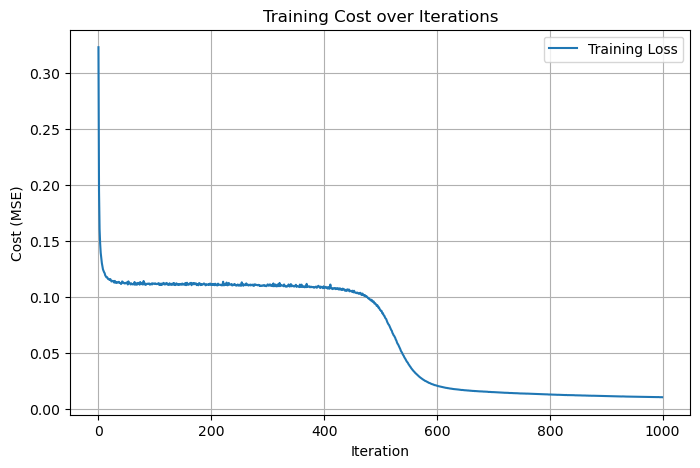

In [5]:
import matplotlib.pyplot as plt

def plot_cost(cost):
    plt.figure(figsize=(8,5))
    plt.plot(cost, label='Training Loss')
    plt.xlabel('Iteration')
    plt.ylabel('Cost (MSE)')
    plt.title('Training Cost over Iterations')
    plt.legend()
    plt.grid(True)
    plt.show()

# After training your model:
# model = NeuralNetwork(...)
# cost = model.fit(x1, y1)
plot_cost(cost)

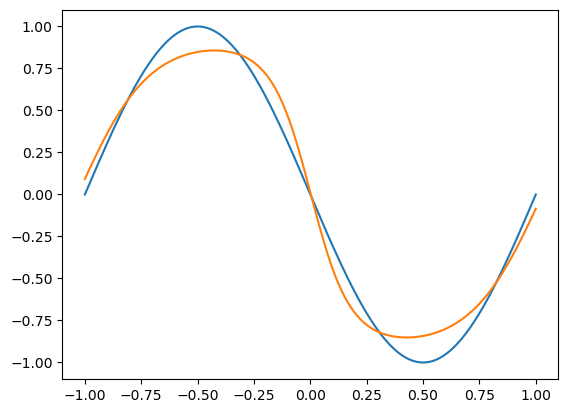

In [6]:
x= np.linspace(0, 2*np.pi,200).reshape(-1, 1)  
y= np.sin(x)
x=(x-np.pi)/(np.pi)
plt.plot(x,y)
z1=(x)@(w1.T)+b1.T
a1=np.tanh(z1)
z2=(a1)@(w2.T)+b2.T
a2=np.tanh(z2)
ypred=a2
plt.plot(x,ypred)